###### Importing libraries:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
% matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

###### Reading in both test and train files

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [4]:
# Check data frame sizes:
train.shape  # 1460 by 81

(1460, 81)

In [5]:
test.shape   # 1459 by 80 - why only 80 columns?

(1459, 80)

In [6]:
# saving sample size as N for train and N2 for test:
N = train.shape[0]
N

1460

In [7]:
N2 = test.shape[0]
N2

1459

In [8]:
# Because test, unlike train, doesn't have the very last variable - SalePrice
# list(train)
# list(test)

In [9]:
# Checking column types:
# train.dtypes   # 81 columns

In [10]:
# test.dtypes   # 80 columns

###### Remove 2 outliers:

In [11]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#### MISSING DATA

In [12]:
# How many missings in each column?
#misscounts = np.sum(train.isnull(), axis=0)/N*100
#print(misscounts[40:].round(2))
# LotFrontage      17.7%
# Alley            93.8% - not really missings, NA = no alley access to property
# MasVnrType        0.5% (8 houses)
# MasVnrArea        0.5% (8 houses)
# BsmtQual          2.5%
# BsmtCond          2.5%
# BsmtExposure      2.6%
# BsmtFinType1      2.5%
# BsmtFinType2      2.6%
# Electrical        0.1% (1 house)
# FireplaceQu      47.3%
# GarageType        5.5%
# GarageYrBlt       5.5%
# GarageFinish      5.5%
# GarageQual        5.5%
# GarageCond        5.5%
# PoolQC           99.5%
# Fence            80.8%
# MiscFeature      96.3%

In [13]:
# Replacing NAs with 'None' in both data frames:
train['BsmtQual'].fillna('NoBasement', inplace=True)
test['BsmtQual'].fillna('NoBasement', inplace=True)

In [14]:
print((train.BsmtQual.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.BsmtQual.value_counts().sort_values(ascending = False)/N*100).round(2))

TA            44.45
Gd            42.33
Ex             8.15
NoBasement     2.53
Fa             2.40
Name: BsmtQual, dtype: float64
TA            43.42
Gd            40.48
Ex             9.38
Fa             3.63
NoBasement     3.01
Name: BsmtQual, dtype: float64


In [15]:
train['bsmt_height'] = 0
train.loc[(train.BsmtQual == 'Fa'), 'bsmt_height'] = 1
train.loc[(train.BsmtQual == 'TA'), 'bsmt_height'] = 2
train.loc[(train.BsmtQual == 'Gd'), 'bsmt_height'] = 3
train.loc[(train.BsmtQual == 'Ex'), 'bsmt_height'] = 4
pd.crosstab(train.BsmtQual, train.bsmt_height)

bsmt_height,0,1,2,3,4
BsmtQual,,,,,
Ex,0,0,0,0,119
Fa,0,35,0,0,0
Gd,0,0,0,618,0
NoBasement,37,0,0,0,0
TA,0,0,649,0,0


In [16]:
test['bsmt_height'] = 0
test.loc[(test.BsmtQual == 'Fa'), 'bsmt_height'] = 1
test.loc[(test.BsmtQual == 'TA'), 'bsmt_height'] = 2
test.loc[(test.BsmtQual == 'Gd'), 'bsmt_height'] = 3
test.loc[(test.BsmtQual == 'Ex'), 'bsmt_height'] = 4
pd.crosstab(test.BsmtQual, test.bsmt_height)

bsmt_height,0,1,2,3,4
BsmtQual,,,,,
Ex,0,0,0,0,137
Fa,0,53,0,0,0
Gd,0,0,0,591,0
NoBasement,44,0,0,0,0
TA,0,0,634,0,0


In [17]:
print(train.shape)
print(test.shape)

(1458, 82)
(1459, 81)


#### Checking number of levels for categorical predictors

###### MasVnrArea: Masonry veneer area in square feet

Check distribution

In [18]:
train.MasVnrArea.describe()

count    1450.000000
mean      102.753793
std       179.442156
min         0.000000
25%         0.000000
50%         0.000000
75%       164.750000
max      1600.000000
Name: MasVnrArea, dtype: float64

###### ExterQual: Exterior material quality

Recoded into numeric 'exterior_quality':
Fa = Fair = 0
TA = Average = 1
Gd = Good = 2
Ex = Excellent = 3


In [19]:
# (train.ExterQual.value_counts().sort_values(ascending = False)/N*100).round(2)

In [20]:
# (test.ExterQual.value_counts().sort_values(ascending = False)/N*100).round(2)

In [21]:
train['exterior_quality'] = 0
train.loc[(train.ExterQual == 'TA'), 'exterior_quality'] = 1
train.loc[(train.ExterQual == 'Gd'), 'exterior_quality'] = 2
train.loc[(train.ExterQual == 'Ex'), 'exterior_quality'] = 3
pd.crosstab(train.ExterQual, train.exterior_quality)

exterior_quality,0,1,2,3
ExterQual,,,,
Ex,0,0,0,50
Fa,14,0,0,0
Gd,0,0,488,0
TA,0,906,0,0


In [22]:
test['exterior_quality'] = 0
test.loc[(test.ExterQual == 'TA'), 'exterior_quality'] = 1
test.loc[(test.ExterQual == 'Gd'), 'exterior_quality'] = 2
test.loc[(test.ExterQual == 'Ex'), 'exterior_quality'] = 3
pd.crosstab(test.ExterQual, test.exterior_quality)

exterior_quality,0,1,2,3
ExterQual,,,,
Ex,0,0,0,55
Fa,21,0,0,0
Gd,0,0,491,0
TA,0,892,0,0


###### ExterCond: Evaluates the present condition of the material on the exterior

Recoded into numeric 'exterior_condition': Po = Poor = 0, Fa = Fair = 1 TA = Average = 2 Gd = Good = 3 Ex = Excellent = 4

In [23]:
# print((train.ExterCond.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((test.ExterCond.value_counts().sort_values(ascending = False)/N*100).round(2))

In [24]:
train['exterior_condition'] = 0
train.loc[(train.ExterCond == 'Fa'), 'exterior_condition'] = 1
train.loc[(train.ExterCond == 'TA'), 'exterior_condition'] = 2
train.loc[(train.ExterCond == 'Gd'), 'exterior_condition'] = 3
train.loc[(train.ExterCond == 'Ex'), 'exterior_condition'] = 4
pd.crosstab(train.ExterCond, train.exterior_condition)

exterior_condition,0,1,2,3,4
ExterCond,,,,,
Ex,0,0,0,0,3
Fa,0,28,0,0,0
Gd,0,0,0,146,0
Po,1,0,0,0,0
TA,0,0,1280,0,0


In [25]:
test['exterior_condition'] = 0
test.loc[(test.ExterCond == 'Fa'), 'exterior_condition'] = 1
test.loc[(test.ExterCond == 'TA'), 'exterior_condition'] = 2
test.loc[(test.ExterCond == 'Gd'), 'exterior_condition'] = 3
test.loc[(test.ExterCond == 'Ex'), 'exterior_condition'] = 4
pd.crosstab(test.ExterCond, test.exterior_condition)

exterior_condition,0,1,2,3,4
ExterCond,,,,,
Ex,0,0,0,0,9
Fa,0,39,0,0,0
Gd,0,0,0,153,0
Po,2,0,0,0,0
TA,0,0,1256,0,0


In [26]:
train[['exterior_quality','exterior_condition']].corr()  # Correlation is just 0.009, good!

,exterior_quality,exterior_condition
exterior_quality,1.000000,0.010152
exterior_condition,0.010152,1.000000


###### BsmtCond: Evaluates the general condition of the basement

In [27]:
# Replacing NAs with 'None' in both data frames:
train['BsmtCond'].fillna('NoBasement', inplace=True)
test['BsmtCond'].fillna('NoBasement', inplace=True)

In [28]:
print((train.BsmtCond.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.BsmtCond.value_counts().sort_values(ascending = False)/N*100).round(2))

TA            89.66
Gd             4.45
Fa             3.08
NoBasement     2.53
Po             0.14
Name: BsmtCond, dtype: float64
TA            88.70
Fa             4.04
Gd             3.90
NoBasement     3.08
Po             0.21
Name: BsmtCond, dtype: float64


In [29]:
train['bsmt_condition'] = 0
train.loc[(train.BsmtCond == 'Po'), 'bsmt_condition'] = 1
train.loc[(train.BsmtCond == 'Fa'), 'bsmt_condition'] = 2
train.loc[(train.BsmtCond == 'TA'), 'bsmt_condition'] = 3
train.loc[(train.BsmtCond == 'Gd'), 'bsmt_condition'] = 4
pd.crosstab(train.BsmtCond, train.bsmt_condition)

bsmt_condition,0,1,2,3,4
BsmtCond,,,,,
Fa,0,0,45,0,0
Gd,0,0,0,0,65
NoBasement,37,0,0,0,0
Po,0,2,0,0,0
TA,0,0,0,1309,0


In [30]:
test['bsmt_condition'] = 0
test.loc[(test.BsmtCond == 'Po'), 'bsmt_condition'] = 1
test.loc[(test.BsmtCond == 'Fa'), 'bsmt_condition'] = 2
test.loc[(test.BsmtCond == 'TA'), 'bsmt_condition'] = 3
test.loc[(test.BsmtCond == 'Gd'), 'bsmt_condition'] = 4
pd.crosstab(test.BsmtCond, test.bsmt_condition)

bsmt_condition,0,1,2,3,4
BsmtCond,,,,,
Fa,0,0,59,0,0
Gd,0,0,0,0,57
NoBasement,45,0,0,0,0
Po,0,3,0,0,0
TA,0,0,0,1295,0


###### BsmtExposure: Refers to walkout or garden level walls

In [31]:
# Replacing NAs with 'None' in both data frames:
train['BsmtExposure'].fillna('NoBasement', inplace=True)
test['BsmtExposure'].fillna('NoBasement', inplace=True)

In [32]:
print((train.BsmtExposure.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.BsmtExposure.value_counts().sort_values(ascending = False)/N*100).round(2))

No            65.27
Av            15.14
Gd             9.04
Mn             7.81
NoBasement     2.60
Name: BsmtExposure, dtype: float64
No            65.14
Av            13.49
Gd             9.73
Mn             8.56
NoBasement     3.01
Name: BsmtExposure, dtype: float64


In [33]:
train['bsmt_exposure'] = 0
train.loc[(train.BsmtExposure == 'Mn'), 'bsmt_exposure'] = 1
train.loc[(train.BsmtExposure == 'Av'), 'bsmt_exposure'] = 2
train.loc[(train.BsmtExposure == 'Gd'), 'bsmt_exposure'] = 3
pd.crosstab(train.BsmtExposure, train.bsmt_exposure)

bsmt_exposure,0,1,2,3
BsmtExposure,,,,
Av,0,0,221,0
Gd,0,0,0,132
Mn,0,114,0,0
No,953,0,0,0
NoBasement,38,0,0,0


In [34]:
test['bsmt_exposure'] = 0
test.loc[(test.BsmtExposure == 'Mn'), 'bsmt_exposure'] = 1
test.loc[(test.BsmtExposure == 'Av'), 'bsmt_exposure'] = 2
test.loc[(test.BsmtExposure == 'Gd'), 'bsmt_exposure'] = 3
pd.crosstab(test.BsmtExposure, test.bsmt_exposure)

bsmt_exposure,0,1,2,3
BsmtExposure,,,,
Av,0,0,197,0
Gd,0,0,0,142
Mn,0,125,0,0
No,951,0,0,0
NoBasement,44,0,0,0


###### BsmtFinType1: Rating of basement finished area

Created 2 quantitative vars: bsmt_finished1 and bsmt_finished2

In [35]:
# Replacing NAs with 'None' in both data frames:
train['BsmtFinType1'].fillna('NoBasement', inplace=True)
train['BsmtFinType2'].fillna('NoBasement', inplace=True)
test['BsmtFinType1'].fillna('NoBasement', inplace=True)
test['BsmtFinType2'].fillna('NoBasement', inplace=True)

In [36]:
# print((train.BsmtFinType1.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((train.BsmtFinType2.value_counts().sort_values(ascending = False)/N*100).round(2))

In [37]:
# print((test.BsmtFinType1.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((test.BsmtFinType2.value_counts().sort_values(ascending = False)/N*100).round(2))

In [38]:
train['bsmt_finished1'] = 0
train.loc[(train.BsmtFinType1 == 'Unf'), 'bsmt_finished1'] = 1
train.loc[(train.BsmtFinType1 == 'LwQ'), 'bsmt_finished1'] = 1
train.loc[(train.BsmtFinType1 == 'BLQ'), 'bsmt_finished1'] = 2
train.loc[(train.BsmtFinType1 == 'Rec'), 'bsmt_finished1'] = 2
train.loc[(train.BsmtFinType1 == 'ALQ'), 'bsmt_finished1'] = 3
train.loc[(train.BsmtFinType1 == 'GLQ'), 'bsmt_finished1'] = 4
pd.crosstab(train.BsmtFinType1, train.bsmt_finished1)

bsmt_finished1,0,1,2,3,4
BsmtFinType1,,,,,
ALQ,0,0,0,220,0
BLQ,0,0,148,0,0
GLQ,0,0,0,0,416
LwQ,0,74,0,0,0
NoBasement,37,0,0,0,0
Rec,0,0,133,0,0
Unf,0,430,0,0,0


In [39]:
train['bsmt_finished2'] = 0
train.loc[(train.BsmtFinType2 == 'Unf'), 'bsmt_finished2'] = 1
train.loc[(train.BsmtFinType2 == 'LwQ'), 'bsmt_finished2'] = 1
train.loc[(train.BsmtFinType2 == 'BLQ'), 'bsmt_finished2'] = 2
train.loc[(train.BsmtFinType2 == 'Rec'), 'bsmt_finished2'] = 2
train.loc[(train.BsmtFinType2 == 'ALQ'), 'bsmt_finished2'] = 3
train.loc[(train.BsmtFinType2 == 'GLQ'), 'bsmt_finished2'] = 4
pd.crosstab(train.BsmtFinType2, train.bsmt_finished1)

bsmt_finished1,0,1,2,3,4
BsmtFinType2,,,,,
ALQ,0,9,6,0,4
BLQ,0,4,12,15,2
GLQ,0,7,5,2,0
LwQ,0,0,21,15,10
NoBasement,37,0,0,0,1
Rec,0,8,15,22,9
Unf,0,476,222,166,390


In [40]:
test['bsmt_finished1'] = 0
test.loc[(test.BsmtFinType1 == 'Unf'), 'bsmt_finished1'] = 1
test.loc[(test.BsmtFinType1 == 'LwQ'), 'bsmt_finished1'] = 1
test.loc[(test.BsmtFinType1 == 'BLQ'), 'bsmt_finished1'] = 2
test.loc[(test.BsmtFinType1 == 'Rec'), 'bsmt_finished1'] = 2
test.loc[(test.BsmtFinType1 == 'ALQ'), 'bsmt_finished1'] = 3
test.loc[(test.BsmtFinType1 == 'GLQ'), 'bsmt_finished1'] = 4
pd.crosstab(test.BsmtFinType1, test.bsmt_finished1)

bsmt_finished1,0,1,2,3,4
BsmtFinType1,,,,,
ALQ,0,0,0,209,0
BLQ,0,0,121,0,0
GLQ,0,0,0,0,431
LwQ,0,80,0,0,0
NoBasement,42,0,0,0,0
Rec,0,0,155,0,0
Unf,0,421,0,0,0


In [41]:
test['bsmt_finished2'] = 0
test.loc[(test.BsmtFinType2 == 'Unf'), 'bsmt_finished2'] = 1
test.loc[(test.BsmtFinType2 == 'LwQ'), 'bsmt_finished2'] = 1
test.loc[(test.BsmtFinType2 == 'BLQ'), 'bsmt_finished2'] = 2
test.loc[(test.BsmtFinType2 == 'Rec'), 'bsmt_finished2'] = 2
test.loc[(test.BsmtFinType2 == 'ALQ'), 'bsmt_finished2'] = 3
test.loc[(test.BsmtFinType2 == 'GLQ'), 'bsmt_finished2'] = 4
pd.crosstab(test.BsmtFinType2, test.bsmt_finished2)

bsmt_finished2,0,1,2,3,4
BsmtFinType2,,,,,
ALQ,0,0,0,33,0
BLQ,0,0,35,0,0
GLQ,0,0,0,0,20
LwQ,0,41,0,0,0
NoBasement,42,0,0,0,0
Rec,0,0,51,0,0
Unf,0,1237,0,0,0


In [42]:
print(train.shape)
print(test.shape)

(1458, 88)
(1459, 87)


###### Basement Square Footage - create a new var - share of finished

In [43]:
train['BsmtFinishedShare'] = 1 - train['BsmtUnfSF']/train['TotalBsmtSF']
train.loc[train.TotalBsmtSF == 0, 'BsmtFinishedShare'] = 0

In [44]:
test['BsmtFinishedShare'] = 1 - test['BsmtUnfSF']/test['TotalBsmtSF']
test.loc[test.TotalBsmtSF == 0, 'BsmtFinishedShare'] = 0

In [45]:
# train[['BsmtUnfSF','TotalBsmtSF','BsmtFinishedShare']]

###### HeatingQC: Heating quality and condition

Created quantitative variable 'heating_quality'

In [46]:
print((train.HeatingQC.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.HeatingQC.value_counts().sort_values(ascending = False)/N*100).round(2))

Ex    50.62
TA    29.32
Gd    16.51
Fa     3.36
Po     0.07
Name: HeatingQC, dtype: float64
Ex    51.51
TA    29.38
Gd    15.96
Fa     2.95
Po     0.14
Name: HeatingQC, dtype: float64


In [47]:
train['heating_quality'] = 0
train.loc[train.HeatingQC == 'Fa', 'heating_quality'] = 1
train.loc[train.HeatingQC == 'TA', 'heating_quality'] = 2
train.loc[train.HeatingQC == 'Gd', 'heating_quality'] = 3
train.loc[train.HeatingQC == 'Ex', 'heating_quality'] = 4
pd.crosstab(train.HeatingQC, train.heating_quality)

heating_quality,0,1,2,3,4
HeatingQC,,,,,
Ex,0,0,0,0,739
Fa,0,49,0,0,0
Gd,0,0,0,241,0
Po,1,0,0,0,0
TA,0,0,428,0,0


In [48]:
test['heating_quality'] = 0
test.loc[test.HeatingQC == 'Fa', 'heating_quality'] = 1
test.loc[test.HeatingQC == 'TA', 'heating_quality'] = 2
test.loc[test.HeatingQC == 'Gd', 'heating_quality'] = 3
test.loc[test.HeatingQC == 'Ex', 'heating_quality'] = 4
pd.crosstab(test.HeatingQC, test.heating_quality)

heating_quality,0,1,2,3,4
HeatingQC,,,,,
Ex,0,0,0,0,752
Fa,0,43,0,0,0
Gd,0,0,0,233,0
Po,2,0,0,0,0
TA,0,0,429,0,0


In [49]:
print(train.shape)
print(test.shape)

(1458, 90)
(1459, 89)


###### KitchenQual: Kitchen quality

Created a numeric variable kitchen_quality

In [50]:
print((train.KitchenQual.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.KitchenQual.value_counts().sort_values(ascending = False)/N*100).round(2))

TA    50.34
Gd    40.14
Ex     6.71
Fa     2.67
Name: KitchenQual, dtype: float64
TA    51.85
Gd    38.70
Ex     7.19
Fa     2.12
Name: KitchenQual, dtype: float64


In [51]:
train['kitchen_quality'] = 0
train.loc[train.KitchenQual == 'TA', 'kitchen_quality'] = 1
train.loc[train.KitchenQual == 'Gd', 'kitchen_quality'] = 2
train.loc[train.KitchenQual == 'Ex', 'kitchen_quality'] = 3
pd.crosstab(train.KitchenQual, train.kitchen_quality)

kitchen_quality,0,1,2,3
KitchenQual,,,,
Ex,0,0,0,98
Fa,39,0,0,0
Gd,0,0,586,0
TA,0,735,0,0


In [52]:
test['kitchen_quality'] = 0
test.loc[test.KitchenQual == 'TA', 'kitchen_quality'] = 1
test.loc[test.KitchenQual == 'Gd', 'kitchen_quality'] = 2
test.loc[test.KitchenQual == 'Ex', 'kitchen_quality'] = 3
pd.crosstab(test.KitchenQual, test.kitchen_quality)

kitchen_quality,0,1,2,3
KitchenQual,,,,
Ex,0,0,0,105
Fa,31,0,0,0
Gd,0,0,565,0
TA,0,757,0,0


###### Functional: Home functionality (Assume typical unless deductions are warranted)

Created quantiative variable home_funct

In [53]:
# print((train.Functional.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((test.Functional.value_counts().sort_values(ascending = False)/N*100).round(2))

In [54]:
train['home_funct'] = 0
train.loc[train.Functional == 'Sev', 'home_funct'] = 0
train.loc[train.Functional == 'Maj2', 'home_funct'] = 1
train.loc[train.Functional == 'Maj1', 'home_funct'] = 1.5
train.loc[train.Functional == 'Mod', 'home_funct'] = 3
train.loc[train.Functional == 'Min2', 'home_funct'] = 5
train.loc[train.Functional == 'Min1', 'home_funct'] = 5.5
train.loc[train.Functional == 'Typ', 'home_funct'] = 7
pd.crosstab(train.Functional, train.home_funct)

home_funct,0.0,1.0,1.5,3.0,5.0,5.5,7.0
Functional,,,,,,,
Maj1,0,0,14,0,0,0,0
Maj2,0,5,0,0,0,0,0
Min1,0,0,0,0,0,31,0
Min2,0,0,0,0,34,0,0
Mod,0,0,0,15,0,0,0
Sev,1,0,0,0,0,0,0
Typ,0,0,0,0,0,0,1358


In [55]:
test['home_funct'] = 0
test.loc[test.Functional == 'Sev', 'home_funct'] = 0
test.loc[test.Functional == 'Maj2', 'home_funct'] = 1
test.loc[test.Functional == 'Maj1', 'home_funct'] = 1.5
test.loc[test.Functional == 'Mod', 'home_funct'] = 3
test.loc[test.Functional == 'Min2', 'home_funct'] = 5
test.loc[test.Functional == 'Min1', 'home_funct'] = 5.5
test.loc[test.Functional == 'Typ', 'home_funct'] = 7
pd.crosstab(test.Functional, test.home_funct)

home_funct,0.0,1.0,1.5,3.0,5.0,5.5,7.0
Functional,,,,,,,
Maj1,0,0,5,0,0,0,0
Maj2,0,4,0,0,0,0,0
Min1,0,0,0,0,0,34,0
Min2,0,0,0,0,36,0,0
Mod,0,0,0,20,0,0,0
Sev,1,0,0,0,0,0,0
Typ,0,0,0,0,0,0,1357


###### FireplaceQu: Fireplace quality

Creating variable fireplace_quality
Consider no fireplace same as Poor quality - just for the sake of it

In [56]:
np.sum(train.FireplaceQu.isnull(), axis=0)/N*100

47.260273972602739

In [57]:
print((train.FireplaceQu.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.FireplaceQu.value_counts().sort_values(ascending = False)/N*100).round(2))

Gd    25.89
TA    21.44
Fa     2.26
Ex     1.64
Po     1.37
Name: FireplaceQu, dtype: float64
Gd    24.93
TA    19.11
Fa     2.81
Po     1.78
Ex     1.30
Name: FireplaceQu, dtype: float64


In [58]:
print(train.shape)
print(test.shape)

(1458, 92)
(1459, 91)


In [59]:
# Creating a quantitative variable - treating "no fireplace" as the worst level (zero)
train['fireplace_quality'] = 0
train.loc[train.FireplaceQu == 'Po', 'fireplace_quality'] = 1
train.loc[train.FireplaceQu == 'Fa', 'fireplace_quality'] = 1  # same as Ben Franklin Stove
train.loc[train.FireplaceQu == 'TA', 'fireplace_quality'] = 2
train.loc[train.FireplaceQu == 'Gd', 'fireplace_quality'] = 3
train.loc[train.Functional == 'Ex', 'fireplace_quality'] = 3.5
# pd.crosstab(train.FireplaceQu, train.fireplace_quality)

In [60]:
pd.crosstab(train.FireplaceQu, train.fireplace_quality)

fireplace_quality,0.0,1.0,2.0,3.0
FireplaceQu,,,,
Ex,24,0,0,0
Fa,0,33,0,0
Gd,0,0,0,378
Po,0,20,0,0
TA,0,0,313,0


In [61]:
test['fireplace_quality'] = 0
test.loc[test.FireplaceQu == 'Po', 'fireplace_quality'] = 1
test.loc[test.FireplaceQu == 'Fa', 'fireplace_quality'] = 1  # same as Ben Franklin Stove
test.loc[test.FireplaceQu == 'TA', 'fireplace_quality'] = 2
test.loc[test.FireplaceQu == 'Gd', 'fireplace_quality'] = 3
test.loc[test.Functional == 'Ex', 'fireplace_quality'] = 3.5
# pd.crosstab(test.FireplaceQu, test.fireplace_quality)

In [62]:
print(train.shape)
print(test.shape)

(1458, 93)
(1459, 92)


###### Dealing with Fireplaces (number of fireplaces)

In [63]:
# print((train.Fireplaces.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((test.Fireplaces.value_counts().sort_values(ascending = False)/N*100).round(2))

In [64]:
print(pd.crosstab(train.Fireplaces, train.fireplace_quality))
train['Fireplaces'].corr(train['fireplace_quality'])

fireplace_quality  0.0  1.0  2.0  3.0
Fireplaces                           
0                  690    0    0    0
1                   19   48  259  323
2                    4    4   53   54
3                    1    1    1    1


0.81499338914099473

In [65]:
# Replacing with NAs those values of fireplace_quality that were actually missing originally:
train.loc[(train.Fireplaces>0)&(train.fireplace_quality == 0), 'fireplace_quality'] = None

In [66]:
test.loc[(test.Fireplaces>0)&(test.fireplace_quality == 0), 'fireplace_quality'] = None

In [67]:
# Create product of fireplace_quality and Fireplaces:
train['fireplace_ttlscore'] = train['Fireplaces'] * train['fireplace_quality']
test['fireplace_ttlscore'] = test['Fireplaces'] * test['fireplace_quality']

In [68]:
print(train['Fireplaces'].corr(train['fireplace_quality']))
print(train['Fireplaces'].corr(train['fireplace_ttlscore']))
print(train['fireplace_quality'].corr(train['fireplace_ttlscore']))

0.849153136283
0.944547823425
0.912629997469


###### GarageType: Garage location

Building a quantitative var gar_type

In [69]:
print((train.GarageType.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.GarageType.value_counts().sort_values(ascending = False)/N*100).round(2))

Attchd     59.52
Detchd     26.51
BuiltIn     5.96
Basment     1.30
CarPort     0.62
2Types      0.41
Name: GarageType, dtype: float64
Attchd     58.42
Detchd     26.85
BuiltIn     6.71
Basment     1.16
2Types      1.16
CarPort     0.41
Name: GarageType, dtype: float64


In [70]:
# Creating a quantitative variable - treating "no garage" as the worst level (zero)
train['gar_type'] = 0
train.loc[train.GarageType == 'CarPort', 'gar_type'] = 1
train.loc[train.GarageType == 'Detchd', 'gar_type'] = 1.5
train.loc[train.GarageType == 'Attchd', 'gar_type'] = 2
train.loc[train.GarageType == 'Basment', 'gar_type'] = 2   # same as Attached
train.loc[train.GarageType == 'BuiltIn', 'gar_type'] = 2.5
train.loc[train.GarageType == '2Types', 'gar_type'] = 3
pd.crosstab(train.GarageType, train.gar_type)

gar_type,1.0,1.5,2.0,2.5,3.0
GarageType,,,,,
2Types,0,0,0,0,6
Attchd,0,0,869,0,0
Basment,0,0,19,0,0
BuiltIn,0,0,0,87,0
CarPort,9,0,0,0,0
Detchd,0,387,0,0,0


In [71]:
test['gar_type'] = 0
test.loc[test.GarageType == 'CarPort', 'gar_type'] = 1
test.loc[test.GarageType == 'Detchd', 'gar_type'] = 1.5
test.loc[test.GarageType == 'Attchd', 'gar_type'] = 2
test.loc[test.GarageType == 'Basment', 'gar_type'] = 2   # same as Attached
test.loc[test.GarageType == 'BuiltIn', 'gar_type'] = 2.5
test.loc[test.GarageType == '2Types', 'gar_type'] = 3
pd.crosstab(test.GarageType, test.gar_type)

gar_type,1.0,1.5,2.0,2.5,3.0
GarageType,,,,,
2Types,0,0,0,0,17
Attchd,0,0,853,0,0
Basment,0,0,17,0,0
BuiltIn,0,0,0,98,0
CarPort,6,0,0,0,0
Detchd,0,392,0,0,0


In [72]:
print(train.shape)
print(test.shape)

(1458, 95)
(1459, 94)


###### GarageFinish: Interior finish of the garage

In [73]:
print((train.GarageFinish.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.GarageFinish.value_counts().sort_values(ascending = False)/N*100).round(2))

Unf    41.44
RFn    28.90
Fin    23.97
Name: GarageFinish, dtype: float64
Unf    42.81
RFn    26.64
Fin    25.14
Name: GarageFinish, dtype: float64


In [74]:
# Creating a quantitative variable - treating "no garage" as the worst level (zero)
train['gar_finish'] = 0
train.loc[train.GarageFinish == 'Unf', 'gar_finish'] = 1
train.loc[train.GarageFinish == 'RFn', 'gar_finish'] = 2
train.loc[train.GarageFinish == 'Fin', 'gar_finish'] = 3
pd.crosstab(train.GarageFinish, train.gar_finish)

gar_finish,1,2,3
GarageFinish,,,
Fin,0,0,350
RFn,0,422,0
Unf,605,0,0


In [75]:
test['gar_finish'] = 0
test.loc[test.GarageFinish == 'Unf', 'gar_finish'] = 1
test.loc[test.GarageFinish == 'RFn', 'gar_finish'] = 2
test.loc[test.GarageFinish == 'Fin', 'gar_finish'] = 3
pd.crosstab(test.GarageFinish, test.gar_finish)

gar_finish,1,2,3
GarageFinish,,,
Fin,0,0,367
RFn,0,389,0
Unf,625,0,0


In [76]:
print(train.shape)
print(test.shape)

(1458, 96)
(1459, 95)


###### GarageQual: Garage quality

In [77]:
print((train.GarageQual.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.GarageQual.value_counts().sort_values(ascending = False)/N*100).round(2))

TA    89.66
Fa     3.29
Gd     0.96
Po     0.21
Ex     0.21
Name: GarageQual, dtype: float64
TA    88.56
Fa     5.21
Gd     0.68
Po     0.14
Name: GarageQual, dtype: float64


In [78]:
pd.crosstab(train.GarageQual, train.GarageCond)

GarageCond,Ex,Fa,Gd,Po,TA
GarageQual,,,,,
Ex,2,0,0,0,1
Fa,0,20,0,4,24
Gd,0,0,4,0,10
Po,0,0,0,3,0
TA,0,15,5,0,1289


In [79]:
# GarageQual
# Creating a quantitative variable - treating "no garage" as the average level (no headache)
train['gar_qual'] = 3
train.loc[train.GarageQual == 'Po', 'gar_qual'] = 1
train.loc[train.GarageQual == 'Fa', 'gar_qual'] = 2
train.loc[train.GarageQual == 'Gd', 'gar_qual'] = 3.5
train.loc[train.GarageQual == 'Ex', 'gar_qual'] = 4
pd.crosstab(train.GarageQual, train.gar_qual)

gar_qual,1.0,2.0,3.0,3.5,4.0
GarageQual,,,,,
Ex,0,0,0,0,3
Fa,0,48,0,0,0
Gd,0,0,0,14,0
Po,3,0,0,0,0
TA,0,0,1309,0,0


In [80]:
test['gar_qual'] = 3
test.loc[test.GarageQual == 'Po', 'gar_qual'] = 1
test.loc[test.GarageQual == 'Fa', 'gar_qual'] = 2
test.loc[test.GarageQual == 'Gd', 'gar_qual'] = 3.5
test.loc[test.GarageQual == 'Ex', 'gar_qual'] = 4
pd.crosstab(test.GarageQual, test.gar_qual)

gar_qual,1.0,2.0,3.0,3.5
GarageQual,,,,
Fa,0,76,0,0
Gd,0,0,0,10
Po,2,0,0,0
TA,0,0,1293,0


In [81]:
print((train.GarageCond.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.GarageCond.value_counts().sort_values(ascending = False)/N*100).round(2))

TA    90.68
Fa     2.40
Gd     0.62
Po     0.48
Ex     0.14
Name: GarageCond, dtype: float64
TA    90.96
Fa     2.67
Po     0.48
Gd     0.41
Ex     0.07
Name: GarageCond, dtype: float64


In [82]:
# GarageCond
# Creating a quantitative variable - treating "no garage" as the average level (no headache)
train['gar_cond'] = 2
train.loc[train.GarageCond == 'Po', 'gar_cond'] = 1
train.loc[train.GarageCond == 'Fa', 'gar_cond'] = 1.5
train.loc[train.GarageCond == 'Gd', 'gar_cond'] = 2.5
train.loc[train.GarageCond == 'Ex', 'gar_cond'] = 3
pd.crosstab(train.GarageCond, train.gar_cond)

gar_cond,1.0,1.5,2.0,2.5,3.0
GarageCond,,,,,
Ex,0,0,0,0,2
Fa,0,35,0,0,0
Gd,0,0,0,9,0
Po,7,0,0,0,0
TA,0,0,1324,0,0


In [83]:
test['gar_cond'] = 2
test.loc[test.GarageCond == 'Po', 'gar_cond'] = 1
test.loc[test.GarageCond == 'Fa', 'gar_cond'] = 1.5
test.loc[test.GarageCond == 'Gd', 'gar_cond'] = 2.5
test.loc[test.GarageCond == 'Ex', 'gar_cond'] = 3
pd.crosstab(test.GarageCond, test.gar_cond)

gar_cond,1.0,1.5,2.0,2.5,3.0
GarageCond,,,,,
Ex,0,0,0,0,1
Fa,0,39,0,0,0
Gd,0,0,0,6,0
Po,7,0,0,0,0
TA,0,0,1328,0,0


In [84]:
# Creating a new variable - product of garage quality & condition:
train['gar_perception'] = train['gar_qual'] * train['gar_cond']
test['gar_perception'] = test['gar_qual'] * test['gar_cond']

In [85]:
# pd.crosstab(train.gar_qual, train.gar_perception)
# pd.crosstab(train.gar_cond, train.gar_perception)

In [86]:
print(train.shape)
print(test.shape)

(1458, 99)
(1459, 98)


###### PavedDrive: Paved driveway

In [87]:
print((train.PavedDrive.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.PavedDrive.value_counts().sort_values(ascending = False)/N*100).round(2))

Y    91.64
N     6.16
P     2.05
Name: PavedDrive, dtype: float64
Y    89.11
N     8.63
P     2.19
Name: PavedDrive, dtype: float64


In [88]:
# Creating a quantitative variable
train['driveway'] = 0
train.loc[train.PavedDrive == 'P', 'driveway'] = 2
train.loc[train.PavedDrive == 'Y', 'driveway'] = 3
pd.crosstab(train.PavedDrive, train.driveway)

driveway,0,2,3
PavedDrive,,,
N,90,0,0
P,0,30,0
Y,0,0,1338


In [89]:
test['driveway'] = 0
test.loc[test.PavedDrive == 'P', 'driveway'] = 2
test.loc[test.PavedDrive == 'Y', 'driveway'] = 3
pd.crosstab(test.PavedDrive, test.driveway)

driveway,0,2,3
PavedDrive,,,
N,126,0,0
P,0,32,0
Y,0,0,1301


In [90]:
print(train.shape)
print(test.shape)

(1458, 100)
(1459, 99)


###### Fence: Fence quality

Build a new var fence

In [91]:
print((train.Fence.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.Fence.value_counts().sort_values(ascending = False)/N*100).round(2))

MnPrv    10.75
GdPrv     4.04
GdWo      3.70
MnWw      0.75
Name: Fence, dtype: float64
MnPrv    11.78
GdPrv     4.04
GdWo      3.97
MnWw      0.07
Name: Fence, dtype: float64


In [92]:
train['fence'] = 0  # No fence are all zero 
train.loc[(train.Fence == 'MnWw')|(train.Fence == 'MnPrv'), 'fence'] = 0.5 # Minimum Wood or Minimum Privacy are 0.5
train.loc[(train.Fence == 'GdWo')|(train.Fence == 'GdPrv'), 'fence'] = 1.5
pd.crosstab(train.Fence, train.fence)

fence,0.5,1.5
Fence,,
GdPrv,0,59
GdWo,0,54
MnPrv,157,0
MnWw,11,0


In [93]:
test['fence'] = 0  # No fence are all zero 
test.loc[(test.Fence == 'MnWw')|(test.Fence == 'MnPrv'), 'fence'] = 0.5 # Minimum Wood or Minimum Privacy are 0.5
test.loc[(test.Fence == 'GdWo')|(test.Fence == 'GdPrv'), 'fence'] = 1.5
pd.crosstab(test.Fence, test.fence)

fence,0.5,1.5
Fence,,
GdPrv,0,59
GdWo,0,58
MnPrv,172,0
MnWw,1,0


In [94]:
print((train.fence.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.fence.value_counts().sort_values(ascending = False)/N*100).round(2))

0.0    80.62
0.5    11.51
1.5     7.74
Name: fence, dtype: float64
0.0    80.07
0.5    11.85
1.5     8.01
Name: fence, dtype: float64


###### MiscFeature: Miscellaneous feature not covered in other categories

In [95]:
print((train.MiscFeature.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.MiscFeature.value_counts().sort_values(ascending = False)/N*100).round(2))

Shed    3.36
Othr    0.14
Gar2    0.14
TenC    0.07
Name: MiscFeature, dtype: float64
Shed    3.15
Gar2    0.21
Othr    0.14
Name: MiscFeature, dtype: float64


###### MiscVal: $Value of miscellaneous feature - 96% are zeroes, but could use as is

In [96]:
# print((train.MiscVal.value_counts().sort_values(ascending = False)/N*100).round(2))

###### MoSold: Month Sold (MM) - could use as is

In [97]:
# print((train.MoSold.value_counts().sort_values(ascending = False)/N*100).round(2))

###### YrSold: Year Sold (YYYY) - could use as is

In [98]:
# print((train.YrSold.value_counts().sort_values(ascending = False)/N*100).round(2))

###### SaleType: Type of sale

In [99]:
print((train.SaleType.value_counts().sort_values(ascending = False)/N*100).round(2))

WD       86.78
New       8.22
COD       2.95
ConLD     0.62
ConLI     0.34
ConLw     0.34
CWD       0.27
Oth       0.21
Con       0.14
Name: SaleType, dtype: float64


###### Summing the number of baths

Created 2 new variables: full_baths and half_baths

In [100]:
# print((train.BsmtFullBath.value_counts().sort_values(ascending = False)/N*100).round(2))

In [101]:
# print((train.BsmtHalfBath.value_counts().sort_values(ascending = False)/N*100).round(2))

In [102]:
# print((train.FullBath.value_counts().sort_values(ascending = False)/N*100).round(2))

In [103]:
# print((train.HalfBath.value_counts().sort_values(ascending = False)/N*100).round(2))

In [104]:
train['full_baths'] = train['BsmtFullBath'] + train['FullBath']
train['half_baths'] = train['BsmtHalfBath'] + train['HalfBath']

In [105]:
test['full_baths'] = test['BsmtFullBath'] + test['FullBath']
test['half_baths'] = test['BsmtHalfBath'] + test['HalfBath']

In [106]:
# No correlation between number of full and half baths:
train['full_baths'].corr(train['half_baths'])

0.0066530493961176529

In [107]:
# train[['half_baths', 'BsmtHalfBath', 'HalfBath']]

In [108]:
print(train.shape)
print(test.shape)

(1458, 103)
(1459, 102)


**Averaging quality variables**

Creating one new variable -- average_quality
Includes: exterior_quality, heating_quality, kitchen_quality, OverallQual and bsmt_heigh

In [109]:
# print((train.exterior_quality.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((train.heating_quality.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((train.kitchen_quality.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((train.OverallQual.value_counts().sort_values(ascending = False)/N*100).round(2))
# We have to scale them before averaging - they are on different scales

In [110]:
# Standardizing quality variables before averaging them:

from sklearn.preprocessing import StandardScaler
temp = train[['exterior_quality', 'heating_quality', 'kitchen_quality', 'OverallQual', 'bsmt_height']]
scaler = StandardScaler()
temp_scaled = pd.DataFrame(scaler.fit_transform(temp), columns=temp.columns)
train['average_quality'] = temp_scaled.mean(axis = 1)

temp = test[['exterior_quality', 'heating_quality', 'kitchen_quality', 'OverallQual', 'bsmt_height']]
scaler = StandardScaler()
temp_scaled = pd.DataFrame(scaler.fit_transform(temp), columns=temp.columns)
test['average_quality'] = temp_scaled.mean(axis = 1)


In [111]:
print(train.shape)
print(test.shape)

(1458, 104)
(1459, 103)


**Dividing GrLivArea / TotRmsAbvGr -- New Variable**

In [112]:
train['room_size'] = train['GrLivArea'] / train['TotRmsAbvGrd']

In [113]:
test['room_size'] = test['GrLivArea'] / train['TotRmsAbvGrd']

In [114]:
print(train.shape)
print(test.shape)

(1458, 105)
(1459, 104)


###### Building house age variable:

In [115]:
train['age'] = train['YrSold'] - train['YearBuilt']
test['age'] = test['YrSold'] - test['YearBuilt']

###### Creating and average Garage-related variable:

In [116]:
# print((train.gar_type.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((train.GarageCars.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((train.gar_finish.value_counts().sort_values(ascending = False)/N*100).round(2))
# Similar range - so it's OK to take an average

In [117]:
# print((test.gar_type.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((test.GarageCars.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((test.gar_finish.value_counts().sort_values(ascending = False)/N*100).round(2))
# Similar range - so it's OK to take an average

In [118]:
# giving more weight to the number of cars in the garage: GarageCars - because it's so important!
train['garage_perception'] = (train['gar_type'] + 2*train['GarageCars'] + train['gar_finish'])/3
test['garage_perception'] = (test['gar_type'] + 2*test['GarageCars'] + test['gar_finish'])/3

###### Separating quant and categorical variables in training set

In [119]:
quant_vars_all = train.select_dtypes(include=['number'])
cat_vars_all = train.select_dtypes(exclude=['number'])
print(quant_vars_all.shape)
print(cat_vars_all.shape)

(1458, 64)
(1458, 43)


###### Imputing missing values for train and test -- DO AFTER TRANS

In [120]:
#quant_vars_all_train = pd.Series(['SalePrice']).append(quant_vars_all, ignore_index=True)
#train2 = train[quant_vars_all].as_matrix()
#test2 = test[quant_vars_all].as_matrix()
#print(train2.shape)
#print(test2.shape)

In [121]:
# test2

In [122]:
# from fancyimpute import MICE

# mice = MICE(n_imputations=100, impute_type='col',)  # In this line we can vary arguments for MICE
# # I can't check what arguments MICE can take as I don't have the package installed
# train2_filled = mice.complete(train2)
# test2_filled = mice.complete(test2)


In [123]:
# pd.set_option('')
# print(quant_vars_all)

In [124]:
# from fancyimpute import MICE

# mice = MICE(n_imputations=100, impute_type='col',)  # In this line we can vary arguments for MICE
# # I can't check what arguments MICE can take as I don't have the package installed
# train2_filled = mice.complete(train2)
# test2_filled = mice.complete(test2)
# # From np arrays back to np dataframes:
# train2 = pd.DataFrame(data = train2_filled, columns = quant_vars_all)
# test2 = pd.DataFrame(data = test2_filled, columns = quant_vars_all)
# print(train2.shape)
# print(test2.shape)


In [125]:
# # Addding back the DV SalePrice:
# train2['SalePrice'] = train.SalePrice

In [126]:
# pd.set_option('display.max_columns', 80)
# # train[quant_vars_all].head()
# np.sum(train.SalePrice == train2.SalePrice)

In [127]:
# import numpy as np
# from sklearn.preprocessing import Imputer
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

In [128]:
# temp1 = train2[quant_vars_all]
# misscounts = np.sum(temp1.isnull(), axis=0)
# print(misscounts.loc[misscounts>0])

# temp2 = test2[quant_vars_all]
# misscounts2 = np.sum(temp2.isnull(), axis=0)
# print(misscounts2.loc[misscounts2>0])

###### Transforming Variables - Log(SalePrice)


 mu = 180932.92 and sigma = 79467.79



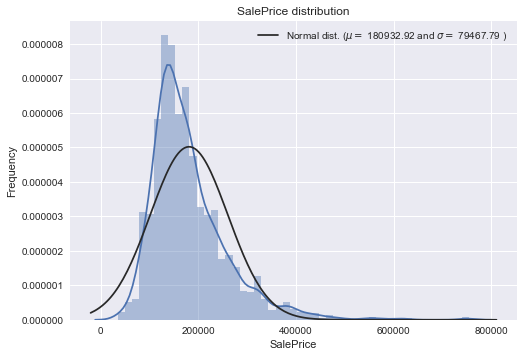

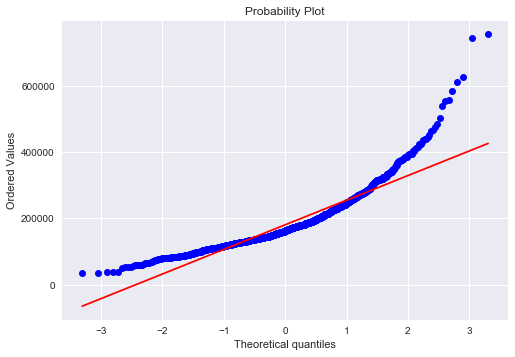

In [129]:
# Visualizing SalePrice vs. log(SalePrice)
# import seaborn and fit and skew functions from scipy
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Plotting Saleprice Distribution
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 180932.92 and sigma = 79467.79



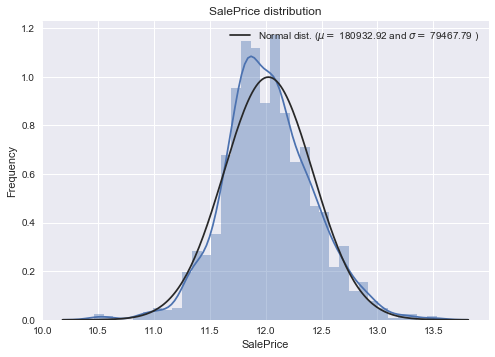

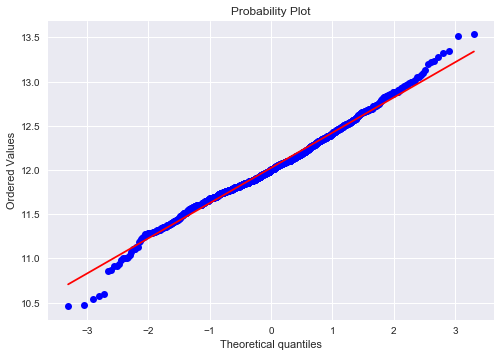

In [130]:
# Plotting log(Saleprice) Distribution and QQ Plot
sns.distplot(np.log(train['SalePrice']) , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(np.log(train['SalePrice']), plot=plt)
plt.show()

###### Creating new variable - log of SalePrice

In [131]:
train['LogSalePrice'] = np.log(train['SalePrice'])

In [132]:
print('Done')

Done


In [133]:
train.shape

(1458, 108)

###### Creating y - logged SalePrice

In [134]:
y = train.LogSalePrice
train_y = train[['SalePrice']]

In [135]:
train.drop("Id", axis = 1, inplace = True) 
test.drop("Id", axis = 1, inplace = True)

### Label Encoding

In [136]:
train_x = train.copy()
train_x = train_x.drop(['SalePrice', 'LogSalePrice'],axis=1)

In [137]:
print(train_x.shape)
print(test.shape)

(1458, 105)
(1459, 105)


In [138]:
ntrain = train_x.shape[0]
ntest = test.shape[0]

In [139]:
all_data = pd.concat([train_x, test]).reset_index(drop=True)
all_data.shape

(2917, 105)

###### Dropping unnecessary columns

In [140]:
all_data = all_data.drop(['Utilities', 'RoofMatl'],axis=1)

In [141]:
all_data = all_data.drop(['Heating','MiscFeature'],axis=1)

In [142]:
all_data = all_data.drop(['BsmtQual','ExterQual','ExterCond', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
'KitchenQual','Functional','FireplaceQu','Fireplaces','GarageType','GarageFinish','GarageQual','GarageCond',
'PavedDrive','Fence','BsmtFullBath','BsmtHalfBath', 'YearBuilt','gar_type','GarageCars','gar_finish'], axis=1)

###### Transforming variables that are really categorical

In [143]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str) 
#Changing OverallCond into a categorical variable 
all_data['OverallCond'] = all_data['OverallCond'].astype(str) 
#Year and month sold are transformed into categorical features. 
all_data['YrSold'] = all_data['YrSold'].astype(str) 
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [144]:
cols = ('PoolQC', 'LandSlope', 'LotShape', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')

In [145]:
from sklearn.preprocessing import LabelEncoder

label_df = all_data.copy()

for c in cols:
    if label_df[c].dtype == 'object':
        le = LabelEncoder()
        #Need to convert the column type to string in order to encode missing values
        label_df[c] = le.fit_transform(label_df[c].astype(str))

In [146]:
# label_df.head()

In [147]:
# pd.set_option('display.max_rows', 200)
# print(label_df.dtypes)

### Imputing Missing Values

######  Transforming Necessary Numeric Features

In [148]:
# Boxcox Transformations
# numeric variables
all_data = label_df
numeric_vars = all_data.select_dtypes(include=['number']).columns
print(numeric_vars)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'MiscVal', 'MoSold', 'YrSold', 'bsmt_height', 'exterior_quality',
       'exterior_condition', 'bsmt_condition', 'bsmt_exposure',
       'bsmt_finished1', 'bsmt_finished2', 'BsmtFinishedShare',
       'heating_quality', 'kitchen_quality', 'home_funct', 'fireplace_quality',
       'fireplace_ttlscore', 'gar_qual', 'gar_cond', 'gar_perception',
       'driveway', 'fence', 'full_baths', 'half_baths', 'average_quality',
       'room_size', 'age', 'garage_perception'],
      dtype

In [149]:
# Check the skew of all numerical features
skewed_feats = all_data[numeric_vars].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
# skewness.head(20)


Skew in numerical features: 



In [150]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 61 skewed numerical features to Box Cox transform


In [151]:
all_data.shape

(2917, 77)

###### Dummifying categorical features:

In [152]:
all_data = pd.get_dummies(all_data, drop_first = True)
print(all_data.shape)

(2917, 181)


######  Getting the new train and test sets

In [153]:
train2 = all_data[:ntrain]
test2 = all_data[ntrain:]
print(train2.shape)
print(test2.shape)

(1458, 181)
(1459, 181)


In [154]:
type(train2)

pandas.core.frame.DataFrame

###### Impute missing values - if any - using MICE

###### Change type of train2 and test2 to matrix - just for fancyimpute

In [155]:
allvars = train2.columns
# allvars

In [156]:
train2 = train2.as_matrix()
test2 = test2.as_matrix()
print(train2.shape)
print(test2.shape)

(1458, 181)
(1459, 181)


In [157]:
print(type(train2))
print(type(test2))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [158]:
from fancyimpute import MICE
mice = MICE(n_imputations=100, impute_type='col')  # In this line we can vary arguments for MICE

train2_filled = mice.complete(train2)
test2_filled = mice.complete(test2)

# From np arrays back to np dataframes:
train2 = pd.DataFrame(data = train2_filled, columns = allvars)
test2 = pd.DataFrame(data = test2_filled, columns = allvars)
print(train2.shape)
print(test2.shape)

[MICE] Completing matrix with shape (1458, 181)
[MICE] Starting imputation round 1/110, elapsed time 0.008
[MICE] Starting imputation round 2/110, elapsed time 0.205
[MICE] Starting imputation round 3/110, elapsed time 0.331
[MICE] Starting imputation round 4/110, elapsed time 0.455
[MICE] Starting imputation round 5/110, elapsed time 0.574
[MICE] Starting imputation round 6/110, elapsed time 0.640
[MICE] Starting imputation round 7/110, elapsed time 0.827
[MICE] Starting imputation round 8/110, elapsed time 0.924
[MICE] Starting imputation round 9/110, elapsed time 1.008
[MICE] Starting imputation round 10/110, elapsed time 1.105
[MICE] Starting imputation round 11/110, elapsed time 1.197
[MICE] Starting imputation round 12/110, elapsed time 1.263
[MICE] Starting imputation round 13/110, elapsed time 1.339
[MICE] Starting imputation round 14/110, elapsed time 1.437
[MICE] Starting imputation round 15/110, elapsed time 1.507
[MICE] Starting imputation round 16/110, elapsed time 1.586
[

[MICE] Starting imputation round 29/110, elapsed time 2.835
[MICE] Starting imputation round 30/110, elapsed time 2.931
[MICE] Starting imputation round 31/110, elapsed time 3.023
[MICE] Starting imputation round 32/110, elapsed time 3.130
[MICE] Starting imputation round 33/110, elapsed time 3.220
[MICE] Starting imputation round 34/110, elapsed time 3.314
[MICE] Starting imputation round 35/110, elapsed time 3.429
[MICE] Starting imputation round 36/110, elapsed time 3.518
[MICE] Starting imputation round 37/110, elapsed time 3.619
[MICE] Starting imputation round 38/110, elapsed time 3.726
[MICE] Starting imputation round 39/110, elapsed time 3.816
[MICE] Starting imputation round 40/110, elapsed time 3.908
[MICE] Starting imputation round 41/110, elapsed time 4.018
[MICE] Starting imputation round 42/110, elapsed time 4.112
[MICE] Starting imputation round 43/110, elapsed time 4.201
[MICE] Starting imputation round 44/110, elapsed time 4.318
[MICE] Starting imputation round 45/110,

###### Standardizing all Variables in our training2 dataframe so that we can detect outliers

In [159]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train2 = pd.DataFrame(scaler.fit_transform(train2), columns=train2.columns)

In [160]:
test2 = pd.DataFrame(scaler.transform(test2), columns=test2.columns)

In [161]:
# Checking it worked
print(sum(train2.mean(axis = 0)))
print(sum(train2.std(axis = 0)))
train2.shape

5.11840872136e-13
181.062103279


(1458, 181)

In [162]:
# Checking it worked
print(sum(test2.mean(axis = 0)))
print(sum(test2.std(axis = 0)))
test2.shape

-0.716989459221
179.090309487


(1459, 181)

### Saving Prepped Data

In [163]:
print(y.shape)
print(train2.shape)
print(test2.shape)

(1458,)
(1458, 181)
(1459, 181)


In [164]:
train_y = y
train_x = train2
test_x = test2
train_y.to_csv('Data/train_y2.csv', index=False)
train_x.to_csv('Data/train_x2.csv', index=False)
test_x.to_csv('Data/test_x2.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'Data/train_x2.csv'

In [ ]:
print('Done')